###**The Sparks Foundaton - GRIP July 2021**

###**Prashant Jain**

#### **Task-1 (Level -Beginner)**

**Problem Statement : The percentage of an student based on the no. of study hours.**

Simple Linear Regression in this regression, we will predict the percentage of marks of students based on the numbers of study hours.

###**Importing Essential Libraries**

In [ ]:
# Importing all the essential libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


###**Loading the Data**

In [ ]:
# Reading data
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [ ]:
#displaying top Ten rows in the dataset
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
 #size of the dataset
dataset.shape  

(25, 2)

In [ ]:
 #columns for the dataset
dataset.columns 

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
# displaying null values and unique values in the dataset
temp=pd.DataFrame({'null_values': dataset.isnull().sum(),'number_of_unique values' : dataset.nunique()})

In [ ]:
temp

,null_values,number_of_unique values
Hours,0,23
Scores,0,23


In [ ]:
 #datatype of columns
dataset.dtypes  

Hours     float64
Scores      int64
dtype: object

In [ ]:
dataset.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


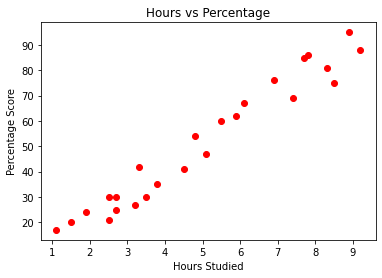

In [ ]:
# Plotting the distribution of scores
plt.scatter(x=dataset['Hours'],y=dataset['Scores'],color = 'red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

###**Preparing the data**

In [ ]:
#Seggregating the Dependent or Independent variable

features=dataset.iloc[:, :-1].values
labels=dataset.iloc[:,-1].values

In [ ]:
features

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
labels

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
#Spliting the dataset into training and testing Set
features_train, features_test, labels_train, labels_test=train_test_split(features,labels,
                                                                          test_size=0.2,random_state=0)

In [ ]:
features_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
labels_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [ ]:
features_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [ ]:
labels_test

array([20, 27, 69, 30, 62])

###**Training the Model**

In [ ]:
regressor=LinearRegression()
regressor.fit(features_train,labels_train)

print("Training complete.")

Training complete.


In [ ]:
print("Regressor slope:  %2.f  "%( regressor.coef_))
print("Regressor intercept:%2.f  "% regressor.intercept_)

Regressor slope:  10  
Regressor intercept: 2  


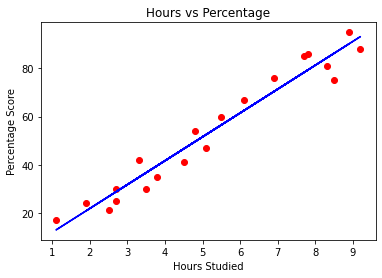

In [ ]:
# Visualising the Training set results
plt.scatter(features_train, labels_train, color = 'red')
plt.plot(features_train, regressor.predict(features_train), color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

###**Making Predictions**

In [ ]:
# Testing data - In Hours
print(features_test) 

# Predicting the scores
y_pred = regressor.predict(features_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': labels_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
print("Training Score: ",regressor.score(features_train,labels_train))
print("Testing Score:",regressor.score(features_test,labels_test))

Training Score:  0.9515510725211553
Testing Score: 0.9454906892105354


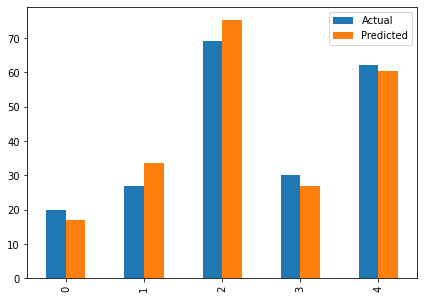

In [ ]:
#plotting the actual and predictedvalue in the bar chart
df.plot(kind='bar',figsize=(7,5))
plt.show()

In [ ]:
print('Mean Absolute Error:', 
      mean_absolute_error(labels_test,y_pred)) 

print('Mean Squared Error: ',mean_squared_error(labels_test,y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error:  21.598769307217456


In [ ]:
#@title Predict the percentage of an student based on the no. of study hours.

Hours_Studied =   9.25#@param {type: "number", min: 1, max: 24} 
own_pred = regressor.predict([[Hours_Studied]])
print("No of Hours_Studied = {}".format(Hours_Studied))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours_Studied = 9.25
Predicted Score = 93.69173248737539
